In [82]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amase\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amase\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amase\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [83]:
annotations_json = pd.read_json('./dataset/tweets_raw.json')

In [84]:
annotations_json

,Corpus,Tweets
0,ALM,"[{'tweet_id': '521033092132503552', 'tweet_tex..."
1,Baltimore,"[{'tweet_id': '593899776564944897', 'tweet_tex..."
2,BLM,"[{'tweet_id': '734202176684298240', 'tweet_tex..."
3,Davidson,"[{'tweet_id': '5', 'annotations': [{'annotator..."
4,Election,"[{'tweet_id': '509464992404357120', 'tweet_tex..."
5,MeToo,"[{'tweet_id': '48430014437122048', 'tweet_text..."
6,Sandy,"[{'tweet_id': '258018822945120256', 'tweet_tex..."


In [85]:
#Validity Checker

sum = 0 
total_tweet = 0
v = []
moral_category = {}

for corpus_i in range(len(annotations_json['Corpus'])):
    valid = 0 
    for tweet in annotations_json['Tweets'][corpus_i]:
        total_tweet += 1
        if 'tweet_text' in tweet:
            sum += 1 
            if tweet['tweet_text'] != 'no tweet text available':
                valid += 1
        for annotation in tweet['annotations']:
            annotations = annotation['annotation'].split(',')
            for i in annotations:
                if i not in moral_category:
                    moral_category[i] = 0
                else:
                    moral_category[i] += 1
    v.append(valid)
                
print("total tweet:",total_tweet,"\ntotal tweet text:",sum,"\nvalid tweet text",v)
            

#Setting up global variable
# moral_OHL = {}
# moral_OHL['care'] = 0
# moral_OHL['purity'] = 1
# moral_OHL['subversion'] = 2 
# moral_OHL['loyalty'] = 3 
# moral_OHL['harm'] = 4
# moral_OHL['cheating'] = 5 
# moral_OHL['fairness'] = 6 
# moral_OHL['non-moral'] = 7 
# moral_OHL['betrayal'] = 8 
# moral_OHL['authority'] = 9 
# moral_OHL['degradation'] =10
moral_OHL = {}
moral_OHL['care'] = 0
moral_OHL['harm'] = 0
moral_OHL['cheating'] = 1
moral_OHL['fairness'] = 1 
moral_OHL['purity'] = 2
moral_OHL['degradation'] =2
moral_OHL['authority'] = 3 
moral_OHL['subversion'] = 3 
moral_OHL['loyalty'] = 4 
moral_OHL['betrayal'] = 4 
moral_OHL['non-moral'] = 5 
OHL_len = 6



total tweet: 34987 
total tweet text: 30114 
valid tweet text [3243, 3942, 3960, 0, 4147, 0, 3673]


In [86]:
# get tweets and annotations for each individual annotator

# DATA-SET1 Individual corpus with individual annotator 
# DATA-SET2 Individual corpus with mix annotator 
# DATA-SET3 Mix corpus with Individual annotator 
# DATA-SET4 Mix corpus with mix annotator 

import re

annotators_tweets = {}

for corpus_i in range(len(annotations_json['Corpus'])):
    for tweet in annotations_json['Tweets'][corpus_i]:
        for annotation in tweet['annotations']:
            
            # make sure annotator exists in the dictionary
            if annotation['annotator'] not in annotators_tweets:
                annotators_tweets[annotation['annotator']] = []
                
            if 'tweet_text' in tweet:
                if tweet['tweet_text'] != 'no tweet text available':
                    
                    #Step 1 Basic Clean up
                    text = re.sub(r'http\S+', '', tweet['tweet_text'])
                    
                    #Getting rid off @
                    text = re.sub(r'@\S+', '', text)
                    
                    #Getting rid off hashtag
                    #text = re.sub(r'#\S+', '', text)
                    
                    #Getting rid off &
                    text = re.sub(r'&amp', '', text)
            
                    #Step 2 - Lowercasing 
                    text = text.lower()
                    
                    #Step 3 - Tokenization
                    text = word_tokenize(text)

                    #Step 4 - Stopwords removal 
                    stop_words = set(stopwords.words('english')) 
                    text = [i for i in text if not i in stop_words]
                    
                    #Step 5 - Stemming
                    newtext = []
                    for i in text:
                        newtext.append(ps.stem(i))
                        
                    #Step 6 - lemmatization
                    new = []
                    for i in newtext:
                        new.append(lemmatizer.lemmatize(i))
                        
                    text = " ".join(new)
  
                    #Setting up onehot for annotations. 
                    annotations = annotation['annotation'].split(',')
                    
                    moral_labels = [0 for i in range(OHL_len)]
                    
                    for i in annotations:
                        if i in moral_OHL:
                            moral_labels[moral_OHL[i]] = 1
            
                    # arrange data format of each tweet 
                    new_tweet = { 'tweet': text,
                                 'moral labels': moral_labels,
                                 'corpus': annotations_json['Corpus'][corpus_i],
                                'tweet_id': tweet['tweet_id'],
                                'annotations': annotations, 
                                }
                    annotators_tweets[annotation['annotator']].append(new_tweet)

In [87]:
# visualize annotator01's first 5 tweets with annotations
annotators_tweets['annotator02'][:10]

[{'tweet': 'wholeheartedli support protest ; act civil disobedi ; join ! # ferguson # alllivesmatt',
  'moral labels': [0, 0, 0, 0, 1, 0],
  'corpus': 'ALM',
  'tweet_id': '537681598989475841',
  'annotations': ['loyalty']},
 {'tweet': 'sandra bland situat man disrespect rest soul , peopl die everyday unjustifi matter # alllivesmatt',
  'moral labels': [0, 1, 0, 0, 0, 0],
  'corpus': 'ALM',
  'tweet_id': '624644420705648640',
  'annotations': ['cheating']},
 {'tweet': 'commit peac , heal love neighbor . give u strength patienc . # portlandprid # alllivesmatt # peac',
  'moral labels': [1, 0, 1, 0, 0, 0],
  'corpus': 'ALM',
  'tweet_id': '752979765984890884',
  'annotations': ['care', 'purity']},
 {'tweet': 'injustic one injustic # alllivesmatt # antoniomartin',
  'moral labels': [1, 0, 1, 0, 1, 0],
  'corpus': 'ALM',
  'tweet_id': '548029362348765185',
  'annotations': ['care', 'loyalty', 'purity']},
 {'tweet': 'compass look like ! # vegan # alllivesmatt',
  'moral labels': [1, 0, 1, 0

In [88]:
#13 annotators 

data_tweets = {}

for annotator in annotators_tweets:
    if len(annotators_tweets[annotator]) > 500:
        data_tweets[annotator] = annotators_tweets[annotator]
        print('"',annotator, ', annotated amount:', len(data_tweets[annotator]))

" annotator00 , annotated amount: 7853
" annotator01 , annotated amount: 7221
" annotator02 , annotated amount: 14478
" annotator03 , annotated amount: 11293
" annotator17 , annotated amount: 626
" annotator04 , annotated amount: 7993
" annotator12 , annotated amount: 914
" annotator13 , annotated amount: 3823
" annotator14 , annotated amount: 3830
" annotator15 , annotated amount: 503
" annotator10 , annotated amount: 3670
" annotator09 , annotated amount: 3673
" annotator11 , annotated amount: 3639


In [89]:
# DATA-SET1  Individual annotator with Individual corpus with
# DATA-SET2  Individual annotator with mixed corpus 
# DATA-SET3  Mixed annotator with individual corpus  
# DATA-SET4  Mixed annotator with mixed corpus 
import json

In [90]:
# DATA-SET1 Individual annotator with Individual corpus with

data_set1 = {}

for annotator in data_tweets:
    if annotator not in data_set1:
        data_set1[annotator] = {}
    for i in data_tweets[annotator]:
        if i['corpus'] not in data_set1[annotator]:
            data_set1[annotator][i['corpus']] = [[],[]]
        else:
            data_set1[annotator][i['corpus']][0].append(i['tweet'])
            data_set1[annotator][i['corpus']][1].append(i['moral labels'])
                
print(data_set1['annotator02']['ALM'][0][:5])
print(data_set1['annotator02']['ALM'][1][:5])

with open('./dataset/iaic3.json', 'w') as outfile:
    json.dump(data_set1, outfile)

['sandra bland situat man disrespect rest soul , peopl die everyday unjustifi matter # alllivesmatt', 'commit peac , heal love neighbor . give u strength patienc . # portlandprid # alllivesmatt # peac', 'injustic one injustic # alllivesmatt # antoniomartin', 'compass look like ! # vegan # alllivesmatt', 'liberti justic ? opportun . # blacklivesmatt # alllivesmatt']
[[0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0], [1, 0, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0]]


In [91]:
for item,key in data_set1.items():
    print(item)
    for j in key:
        print(j,len(data_set1[item][j][0]))
                

annotator00
ALM 86
BLM 3827
Election 3937
annotator01
ALM 3105
Baltimore 58
BLM 3879
Election 43
Sandy 131
annotator02
ALM 3212
Baltimore 3482
BLM 3894
Election 3886
annotator03
ALM 3233
BLM 3944
Election 4113
annotator17
ALM 171
Baltimore 425
BLM 5
Election 8
Sandy 12
annotator04
ALM 0
BLM 3922
Election 4068
annotator12
Baltimore 913
annotator13
Baltimore 3822
annotator14
Baltimore 3829
annotator15
Baltimore 502
annotator10
Sandy 3669
annotator09
Sandy 3672
annotator11
Sandy 3638


In [92]:
# DATA-SET2 Individual annotator with mixed corpus 

data_set2 = {}

for annotator in data_tweets:
    if annotator not in data_set2:
        data_set2[annotator] = [[],[]]
    for i in data_tweets[annotator]:
        data_set2[annotator][0].append(i['tweet'])
        data_set2[annotator][1].append(i['moral labels'])
                

print(data_set2['annotator02'][0][:5])
print(data_set2['annotator02'][1][:5])

with open('./dataset/iamc3.json', 'w') as outfile:
    json.dump(data_set2, outfile)

['wholeheartedli support protest ; act civil disobedi ; join ! # ferguson # alllivesmatt', 'sandra bland situat man disrespect rest soul , peopl die everyday unjustifi matter # alllivesmatt', 'commit peac , heal love neighbor . give u strength patienc . # portlandprid # alllivesmatt # peac', 'injustic one injustic # alllivesmatt # antoniomartin', 'compass look like ! # vegan # alllivesmatt']
[[0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0], [1, 0, 1, 0, 0, 0]]


In [93]:
# DATA-SET3  Mixed annotator with individual corpus  

data_set3 = {}

for annotator in data_tweets:
    for i in data_tweets[annotator]:
        if i['corpus'] not in data_set3:
            data_set3[i['corpus']] = [[],[]]
        else:
            data_set3[i['corpus']][0].append(i['tweet'])
            data_set3[i['corpus']][1].append(i['moral labels'])
                
print(data_set3['ALM'][0][:5])
print(data_set3['ALM'][1][:5])

with open('./dataset/maic3.json', 'w') as outfile:
    json.dump(data_set3, outfile)

['sandra bland situat man disrespect rest soul , peopl die everyday unjustifi matter # alllivesmatt', 'commit peac , heal love neighbor . give u strength patienc . # portlandprid # alllivesmatt # peac', 'injustic one injustic # alllivesmatt # antoniomartin', 'compass look like ! # vegan # alllivesmatt', 'black twitter see someon tweet # alllivesmatt']
[[1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1]]


In [94]:
for item,key in data_set3.items():
    print(item,len(data_set3[item][0]))

ALM 9812
BLM 19476
Election 16060
Baltimore 13037
Sandy 11126


In [174]:
# DATA-SET4  Mixed corpus with mixed annotator 

data_set4 = [[],[]]

for annotator in data_tweets:
    for i in data_tweets[annotator]:
        data_set4[0].append(i['tweet'])
        data_set4[1].append(i['moral labels'])
                
print(data_set4[0][:5])
print(data_set4[1][:5])

j = set(data_set4[0])
print(len(j))
# with open('./dataset/mamc3.json', 'w') as outfile:
#     json.dump(data_set4, outfile)

['wholeheartedli support protest ; act civil disobedi ; join !', 'sandra bland situat man disrespect rest soul , peopl die everyday unjustifi matter', 'commit peac , heal love neighbor . give u strength patienc .', 'injustic one injustic', 'compass look like !']
[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
16652


In [28]:
a = ['1','2','3']
b = '  '.join(a)
b

'1  2  3'

In [39]:
text = "@Dante God created our skin tones with beautiful variety, \
but all of our souls are the same color #AllLivesMatter"

text = re.sub(r'@\S+', '', text)

#Getting rid off hashtag
text = re.sub(r'#\S+', '', text)

#Getting rid off &
text = re.sub(r'&amp', '', text)

#Getting rid off emoji, new lines
text = re.sub(r'\\\\u....', '', text)
print(text)
#Step 2 - Lowercasing 
text = text.lower()
print(text)
#Step 3 - Tokenization
text = word_tokenize(text)
print(text)
#Step 3 - Stopwords removal 

stop_words = set(stopwords.words('english')) 
text = [i for i in text if not i in stop_words]
print(text)
 
#Step 5 - Stemming
newtext = []
for i in text:
    newtext.append(ps.stem(i))
print(newtext)
#Step 6 - lemmatization
new = []
for i in newtext:
    new.append(lemmatizer.lemmatize(i))
    
print(new)



 God created our skin tones with beautiful variety, but all of our souls are the same color 
 god created our skin tones with beautiful variety, but all of our souls are the same color 
['god', 'created', 'our', 'skin', 'tones', 'with', 'beautiful', 'variety', ',', 'but', 'all', 'of', 'our', 'souls', 'are', 'the', 'same', 'color']
['god', 'created', 'skin', 'tones', 'beautiful', 'variety', ',', 'souls', 'color']
['god', 'creat', 'skin', 'tone', 'beauti', 'varieti', ',', 'soul', 'color']
['god', 'creat', 'skin', 'tone', 'beauti', 'varieti', ',', 'soul', 'color']


In [163]:
import string
import numpy as np
import matplotlib.pyplot as plt
import collections
from itertools import tee, islice
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

C = []
for item,key in data_set3.items():
    C.append(key[1])
    print(item)

PCI = []

for i in range(len(C)):
    pc = PCA(n_components=3)
    p = pc.fit_transform(C[i])
    pcax = pd.DataFrame(data = p
             , columns = ['pc1', 'pc2','pc3'])  
    PCI.append(pcax)

ALM
BLM
Election
Baltimore
Sandy


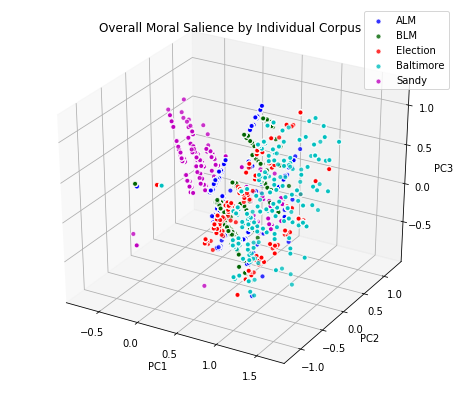

In [164]:
numbers =['ALM','BLM','Election','Baltimore','Sandy',5,6,7,8,9]
colors = ['b', 'darkgreen', 'r', 'c', 'm', 'y', 'k', 'limegreen','gold','indigo']

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(C)):
    ax.scatter(PCI[i].pc1, PCI[i].pc2, PCI[i].pc3, color=colors[i],label=numbers[i], s=25,alpha=0.8, edgecolors='w')

ax.set_title("Overall Moral Salience by Individual Corpus")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

In [160]:
C = []
for item,key in data_set2.items():
    C.append(key[1])
    print(item)

PCI = []

for i in range(len(C)):
    pc = PCA(n_components=3)
    p = pc.fit_transform(C[i])
    pcax = pd.DataFrame(data = p
             , columns = ['pc1', 'pc2','pc3'])  
    PCI.append(pcax)

annotator00
annotator01
annotator02
annotator03
annotator17
annotator04
annotator12
annotator13
annotator14
annotator15
annotator10
annotator09
annotator11


C:\Users\amase\Anaconda3\lib\site-packages\sklearn\decomposition\pca.py:536: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


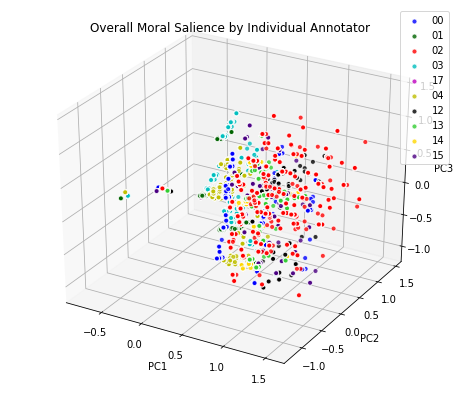

In [161]:
numbers =['00','01','02','03','17','04','12','13','14','15']
colors = ['b', 'darkgreen', 'r', 'c', 'm', 'y', 'k', 'limegreen','gold','indigo']

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    ax.scatter(PCI[i].pc1, PCI[i].pc2, PCI[i].pc3, color=colors[i],label=numbers[i], s=25,alpha=0.8, edgecolors='w')

ax.set_title("Overall Moral Salience by Individual Annotator")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

In [153]:
tags = ['ALM','BLM','Election','Baltimore','Sandy']
names = [[],[],[],[],[]]
C = [[],[],[],[],[]]

for item,key in data_set1.items():
    for j in key:
        if len(data_set1[item][j][1])>200:
            C[tags.index(j)].append(data_set1[item][j][1])
            names[tags.index(j)].append(item)
PCI = []

for i in range(len(C)):
    PCI.append([])
    for j in range(len(C[i])):
        pc = PCA(n_components=3)
        p = pc.fit_transform(C[i][j])
        pcax = pd.DataFrame(data = p
                 , columns = ['pc1', 'pc2','pc3'])  
        PCI[i].append(pcax)

C:\Users\amase\Anaconda3\lib\site-packages\sklearn\decomposition\pca.py:447: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


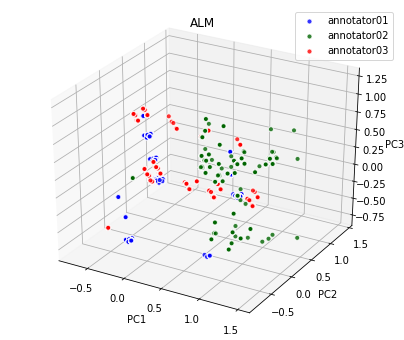

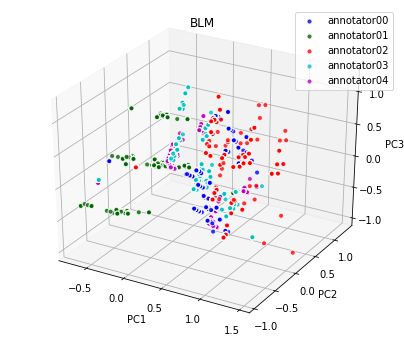

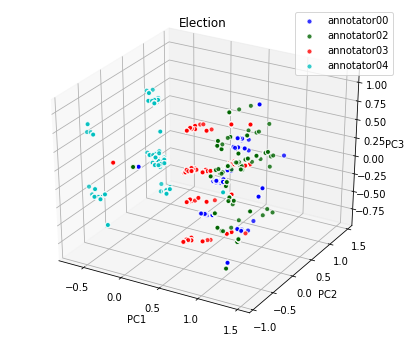

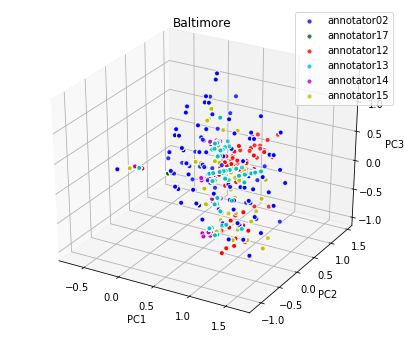

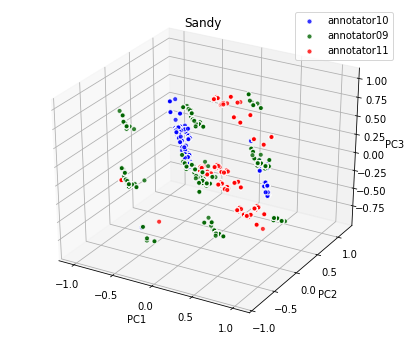

In [154]:
colors = ['b', 'darkgreen', 'r', 'c', 'm', 'y', 'k', 'limegreen','gold','indigo']
for j in range(len(C)):
    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(C[j])):
        ax.scatter(PCI[j][i].pc1, PCI[j][i].pc2, PCI[j][i].pc3, color=colors[i],label=names[j][i], s=25,alpha=0.8, edgecolors='w')

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(tags[j])
    ax.legend()
    plt.show()

In [156]:
#Individual - MAP. 

annotators = ["annotator00","annotator01","annotator02","annotator03","annotator17","annotator04","annotator12","annotator13","annotator14","annotator15","annotator10","annotator09","annotator11"]

names = [[] for i in range(13)]
C = [[] for i in range(13)]

for item,key in data_set1.items():
    if item in annotators:
        for j in key:
            if len(data_set1[item][j][1])>200:
                C[annotators.index(item)].append(data_set1[item][j][1])
                names[annotators.index(item)].append(j)
PCI = []

for i in range(len(C)):
    PCI.append([])
    for j in range(len(C[i])):
        pc = PCA(n_components=3)
        p = pc.fit_transform(C[i][j])
        pcax = pd.DataFrame(data = p
                 , columns = ['pc1', 'pc2','pc3'])  
        PCI[i].append(pcax)

C:\Users\amase\Anaconda3\lib\site-packages\sklearn\decomposition\pca.py:447: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


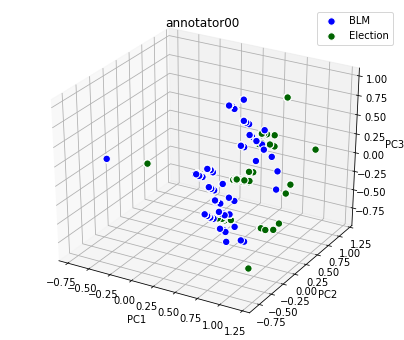

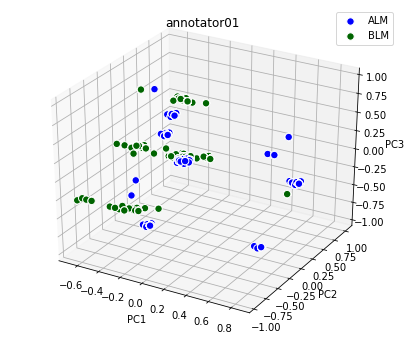

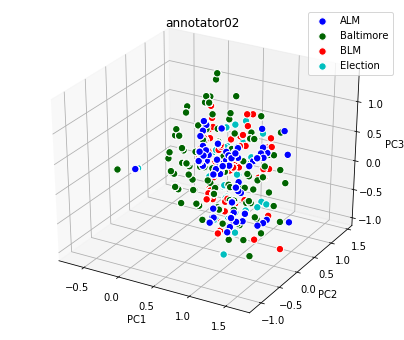

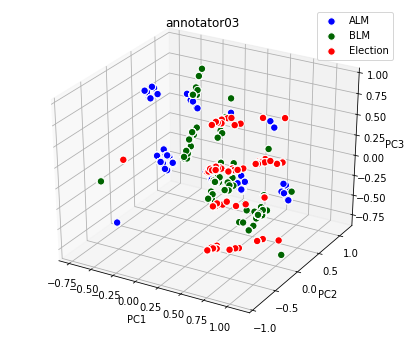

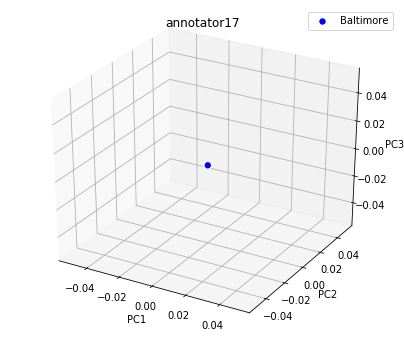

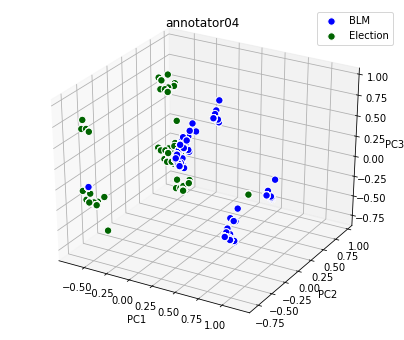

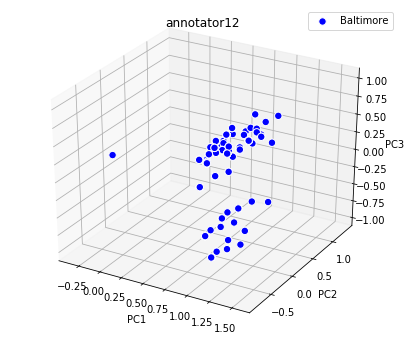

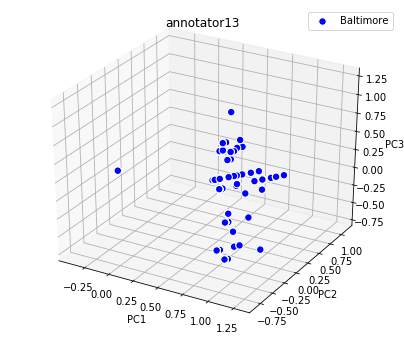

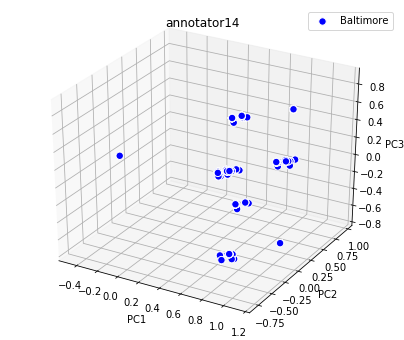

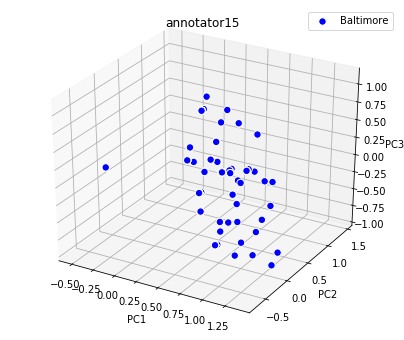

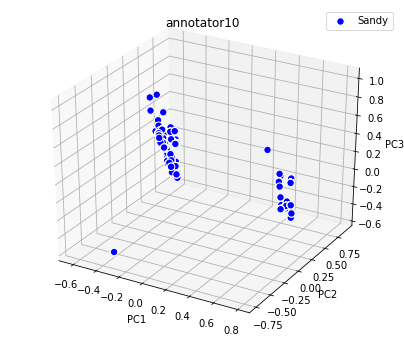

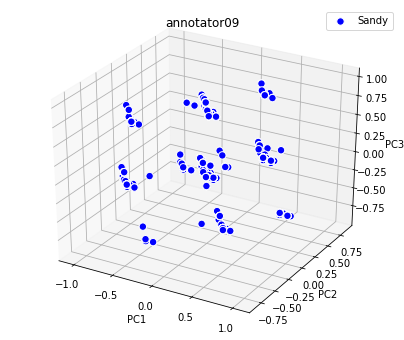

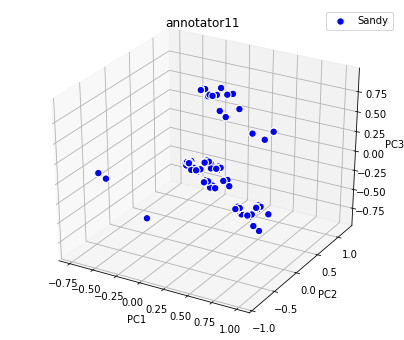

In [157]:
colors = ['b', 'darkgreen', 'r', 'c', 'm', 'y', 'k', 'limegreen','gold','indigo']
for j in range(len(C)):
    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(C[j])):
        ax.scatter(PCI[j][i].pc1, PCI[j][i].pc2, PCI[j][i].pc3, color=colors[i],label=names[j][i], s=55,alpha=1, edgecolors='w')

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(annotators[j])
    ax.legend()
    plt.show()

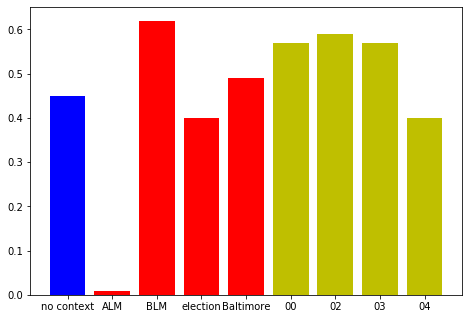

In [188]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['no context', 'ALM', 'BLM', 'election', 'Baltimore',"00",
"02",
"03",
"04"]
colors = ['b', 'r', 'r', 'r', 'r', 'y', 'y','y','y']
students = [0.45,0.008,0.62,0.4,0.49,0.57,0.59,0.57,0.4]
ax.bar(langs,students,color=colors)
plt.show()

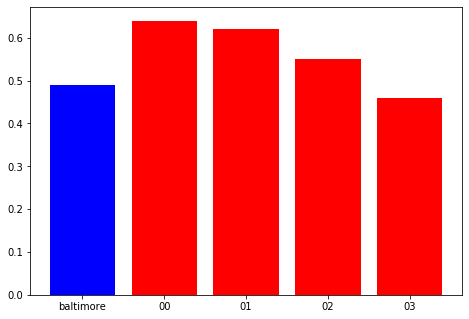

In [189]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['baltimore', '00', '01', '02', '03']
students = [0.49,
0.64,
0.62,
0.55,
0.46]
colors = ['b', 'r', 'r', 'r', 'r']
ax.bar(langs,students,color=colors)
plt.show()

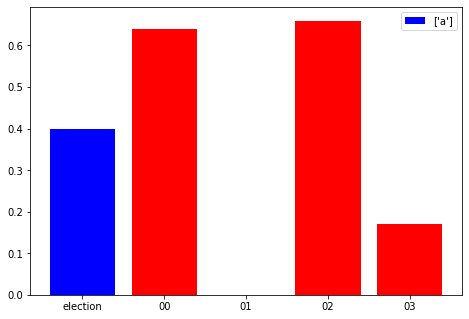

In [194]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['election', '00', '01', '02', '03']
students = [0.4,
0.64,
0,
0.66,
0.17,]
colors = ['b', 'r', 'r', 'r', 'r']
labels = ["a"]
ax.bar(langs,students,color=colors,label=labels)
plt.legend()
plt.show()

In [196]:
solution = []
for x in range(10):
    for y in range(10):
        if (y-1.5*x <= 0) and (y+1.5*x<=3):
            solution.append((x,y))

In [197]:
solution

[(0, 0), (1, 0), (1, 1), (2, 0)]